In [2]:

import pandas as pd
from config import BASE_DIR
RERUN = False

## Data

In [4]:
#Pre processing in ETL notebook
#Topic modeling in topicModeling notebook
df_by_book_topics = pd.read_csv('data/full_data_nonbib_01_05_24_with_topics.csv')
df_by_book = pd.read_csv('data/full_data_nonbib_01_05_24.csv')

## Clustering

Before implementing a complex Graph Neural Network (GNN) for unsupervised clustering, I want to clarify the problem, as the current research proposal seems vague. This step will help me understand our current leads and establish solid baselines. I aim for this research to be reproducible and fully open-sourced, facilitating easy use of our codebase and baselines by other researchers trying different methods.

### Settings

1. **Sentence Definition:**
   - A sentence is a sliding window of 15 words.
   - For a book with 160 words, it will be split into: 10 sentences of 15 words each, plus 1 sentence of 10 words.

2. **Data Source:**
   - Using non-biblical Hebrew Qumran scrolls (383 books).

3. **Composition Labels:**
   - A composition is a label consisting of several books together.
   - For example, books 11Q20 and 11Q19 are from the Temple Scroll composition.
   - We currently have 25 unique compositions over 98 books.

4. **Clustering Methodology:**
   - **Step 1:** Convert each book into sentences.
   - **Step 2:** Vectorize the text (using n-grams, TF-IDF, Word2Vec, BERT, etc.).
   - **Step 3:** Clustering:
     - **Unsupervised Clustering:** Using one of the following:
       - Hierarchical Clustering
       - Centroid-based Clustering (e.g., K-means)
       - Model-based Clustering (e.g., Gaussian Mixture Models)
       - Density-based Clustering (e.g., DBSCAN)
   - **Step 4:** Evaluation:
     - **Unsupervised Evaluation:** Metrics from [Cluster Analysis: Evaluation and Assessment](https://en.wikipedia.org/wiki/Cluster_analysis#Evaluation_and_assessment).
       - Examples: [Rand Index](https://en.wikipedia.org/wiki/Rand_index), [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering)), [Calinski-Harabasz Index](https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index), etc.

### Consideration for Supervised Clustering

- **Question:** Should we also perform supervised clustering?
  - **Labels:** Could be book or composition.
  - **Benefit:** This step could enhance confidence in our unsupervised methods.

### Clustering Objectives
We can explore various clustering strategies:

1. **Clustering by Book:**
   - Cluster sentences to ensure they belong to the correct book.

2. **Clustering by Composition:**
   - Cluster sentences to ensure they belong to the correct composition.

3. **Clustering within a Book:**
   - Cluster sentences to group those that are textually close within each book.

4. **Clustering of Serech Hayahad:**
   - Focus specifically on clustering within the Serech Hayahad text.

5. **Temple Scroll Clustering:**
   - Differentiate between sectarian and non-sectarian content within the Temple Scroll.


### Reading list
1. [Document Embedding Techniques](https://towardsdatascience.com/document-embedding-techniques-fed3e7a6a25d)
2. Mining text data - book
3. [clustering-sentence-embeddings-to-identify-intents-in-short-text - PRACTICAL](https://towardsdatascience.com/clustering-sentence-embeddings-to-identify-intents-in-short-text-48d22d3bf02e)
4. [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084)
5. [Open Intent Discovery through Unsupervised
Semantic Clustering and Dependency Parsing](https://arxiv.org/pdf/2104.12114)
6. [Is Everything in Order? A Simple Way to Order Sentences](https://aclanthology.org/2021.emnlp-main.841.pdf)
7. [The performance of BERT as data representation of text clustering](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-022-00564-9)
8. [Understanding and explaining Delta measures for authorship attribution](https://academic.oup.com/dsh/article/32/suppl_2/ii4/3865676)

Word ordering:
1. [Word Ordering as Unsupervised Learning
Towards Syntactically Plausible Word Representations](https://aclanthology.org/I17-1008.pdf)
2. [UNSUPERVISED ORDER LEARNING](https://openreview.net/pdf?id=1CK45cqkEh)
3. [Graph based Neural Sentence Ordering](https://github.com/DeepLearnXMU/NSEG)
4. [Graph based Neural Sentence Ordering](https://arxiv.org/pdf/1611.02654v2)
5. [A New Sentence Ordering Method Using BERT
Pretrained Model](https://arxiv.org/pdf/2108.11994)
6. https://openreview.net/pdf?id=S1AG8zYeg

Surveys:
1. [Short Text Clustering Algorithms, Application and Challenges: A Survey](https://www.mdpi.com/2076-3417/13/1/342)
2. [Incremental hierarchical text clustering methods: a review](https://arxiv.org/html/2312.07769v1)
3. [A comprehensive survey of clustering algorithms: State-of-the-art machine learning applications, taxonomy, challenges, and future research prospects](https://www.sciencedirect.com/science/article/pii/S095219762200046X)
4. [A Systematic Literature Review on Identifying Patterns Using Unsupervised Clustering Algorithms: A Data Mining Perspective](https://www.mdpi.com/2073-8994/15/9/1679)
5. [Constrained Clustering: Current and New Trends](https://link.springer.com/chapter/10.1007/978-3-030-06167-8_14) - offline

Clustering:
1. [Evaluation of Hierarchical Clustering Algorithms for
Document Datasets∗](https://dl.acm.org/doi/pdf/10.1145/584792.584877)


Stylometry:
1. [https://pan.webis.de/organization.html](PAN - organiztion fot text forensics)
2. [Surveying Stylometry Techniques and Applications](https://dl.acm.org/doi/10.1145/3132039)
3. Advanced Models for Stylometric Applications - offline
4. [A review on authorship attribution in text mining
](https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wics.1584)


Graphs:
1. [Graph Embedding Techniques, Applications, and Performance: A Survey](https://arxiv.org/pdf/1705.02801)


TODO:
1. Finish reading the הצעה and then finish the clustering baseline ideas.
2. Recunstruction of van hecke paper.
3. Reading!!!
4. 

In [134]:

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

clustering_label = "composition"

df_by_book_non_nulls = df_by_book[~(df_by_book[clustering_label].isna())]

In [135]:
df_by_book_non_nulls

,book,text,label,section,processed_text,lemmatized_text,composition
1,11Q12,הודענו בצאתנו לפני יהוה אלוהינו את כול החטאו...,nonbib,non_sectarian_texts,הודענו בצאתנו יהוה אלוהינו כול החטאות יעשו בשמ...,הודיע יציאה יהוה אלוהים כול חטאת נעשה שמיים אר...,Book_of_Jubilees
5,11Q19,כי נורא הוא אשר אני עושה עמכה . הנני גורש מ...,nonbib,unknown,נורא עושה עמכה הנני גורש מפניכה האמורי הכנעני ...,נורא עושה עמכה הנה גורש מפני האמורי כנעני החתי...,Temple Scroll
6,11Q20,והקריבו על המזבח לכול יום ויום פר בן...,nonbib,unknown,והקריבו המזבח לכול יום ויום פר בן בקר אחד איל ...,הקריב מזבח כול יום יום פר בן בקר אחד איל אחד כ...,Temple Scroll
7,11Q21,וכליה יהיו זהב טהור וכול מזבח העולה יעשו נחושת...,nonbib,unknown,וכליה יהיו זהב טהור וכול מזבח העולה יעשו נחושת...,כלי היה זהב טהור כול מזבח עולה נעשה נחושת טהור...,Temple Scroll
10,11Q5,לטובים נפשתכמה ולתמימים לפאר עליון . החבירו יח...,nonbib,non_sectarian_texts,לטובים נפשתכמה ולתמימים לפאר עליון החבירו יחד ...,טוב חוכמה תמים לפאר עליון החבירו יחד הודיע ישע...,Ps
...,...,...,...,...,...,...,...
287,4Q510,תשבוחות . ברכות למלך הכבוד . דברי הודות בתהלי...,nonbib,sectarian_texts,תשבוחות ברכות למלך הכבוד דברי הודות בתהלי לאלו...,תשבוחות ברכה מלך כבוד דבר הודות תהילה אלוהים ד...,Songs_of_Maskil
288,4Q511,ממשלותם וכול בארץ ובכול רוחות ממשל...,nonbib,sectarian_texts,ממשלותם וכול בארץ ובכול רוחות ממשלתה תמיד יברכ...,ממשלה כול ארץ כול רוח ממשלה תמיד בירך קץ יום כ...,Songs_of_Maskil
341,4Q88,אזכרך לברכה ציון בכול מודי אני אהבתיך . ברוך ...,nonbib,NaN,אזכרך לברכה ציון בכול מודי אהבתיך ברוך לעולמים...,נזכר ברכה ציון כול הכיר אהבה ברוך לעולמים זכר ...,Ps
349,6Q15,בוני החיץ אשר הלכו אחרי צו הצו הוא מטיף אשר אמ...,nonbib,sectarian_texts,בוני החיץ הלכו צו הצו מטיף אמר הטף יטיפון נתפש...,בונה חיץ הלך צו צו הטיף אמר טף יטיפון נתפש שני...,The Damascus document (not Cave 4)


In [137]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Ensure you have the necessary NLTK data
nltk.download('punkt')


def divide_to_sentences(documents, max_words_per_sentence=15):
    """
    This function divides each document in a list into sentences with a maximum of `max_words_per_sentence` words.
    
    :param documents: List of documents (strings).
    :param max_words_per_sentence: Maximum number of words per sentence.
    :return: List of lists where each sublist contains sentences of `max_words_per_sentence` words.
    """
    result = []
    for doc in documents:
        sentences = []
        # Tokenize document into sentences
        raw_sentences = sent_tokenize(doc)
        # raw_sentences = doc.split(" ")
        for raw_sentence in raw_sentences:
            # Tokenize sentence into words
            words = word_tokenize(raw_sentence)
            # Split words into chunks of max_words_per_sentence
            for i in range(0, len(words), max_words_per_sentence):
                sentence_chunk = words[i:i + max_words_per_sentence]
                # Join words to form the sentence
                sentences.append(' '.join(sentence_chunk))
        result.append(sentences)
    return result


def convert_df_by_book_to_df_by_sentence(df, text_col, window=15):
    corpus = df[text_col].to_list()
    corpus_by_sentence = divide_to_sentences(corpus, window)
    new_data_by_sentence = []
    for i, row in df.reset_index().drop("index", axis=1).iterrows():
        tmp_row = {}
        dict_row = row.to_dict()
        for sentence in corpus_by_sentence[i]:
            tmp_row = {"book": dict_row["book"], "processed_text": sentence, "label": dict_row["label"],
                       "section": dict_row["section"], "composition": dict_row["composition"], }
            new_data_by_sentence.append(tmp_row)
    return pd.DataFrame(new_data_by_sentence)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yonatanlou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Van hecke article recunstruction

In [147]:
df_by_book["len_words"] = df_by_book["processed_text"].str.split(" ").str.len()
df_by_book[df_by_book["len_words"] >= 300]
df_by_book_non_nulls = df_by_book[~(df_by_book[clustering_label].isna())]
df_by_sentence = convert_df_by_book_to_df_by_sentence(df_by_book_non_nulls, "processed_text", 500)

In [148]:

from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib.patches import Circle
import matplotlib.pyplot as plt


def hierarchical_clustering_analysis(data, composition_to_check, max_features=500, ngram_range=(2, 3)):
    data = data[df_by_sentence["composition"].isin(composition_to_check)]
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range, max_features=max_features)
    X = vectorizer.fit_transform(data['processed_text']).toarray()

    # Function to calculate the delta method distance
    def delta_method_distance(X):
        mean_vector = X.mean(axis=0)
        distances = pdist(X, metric=lambda u, v: np.sum(np.abs((u - mean_vector) - (v - mean_vector))))
        return squareform(distances)

    # Calculate the distance matrix
    distance_matrix = delta_method_distance(X)

    # Perform hierarchical clustering
    linkage_matrix = linkage(distance_matrix, method='ward')
    # Determine the color threshold
    max_distance = np.max(linkage_matrix[:, 2])
    color_threshold = max_distance * 0.5

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=color_threshold, criterion='distance')

    # Plot PCA result with clustering
    plt.figure(figsize=(15, 10))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'Delta method for {composition_to_check}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster Label')

    # Calculate and plot circles around each cluster
    unique_labels = np.unique(cluster_labels)
    for label in unique_labels:
        cluster_points = X_pca[cluster_labels == label]
        centroid = cluster_points.mean(axis=0)
        radius = np.max(np.sqrt(np.sum((cluster_points - centroid) ** 2, axis=1)))
        circle = Circle(centroid, radius, color='gray', fill=False, linestyle='--')
        plt.gca().add_patch(circle)

    for i, txt in enumerate(data["composition"]):
        plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)

    plt.show()

    plt.figure(figsize=(20, 15))
    dendrogram(linkage_matrix, labels=data['book'].values, leaf_rotation=0, leaf_font_size=10, orientation='right',
               color_threshold=color_threshold)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()






/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_48881/465291489.py:25: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


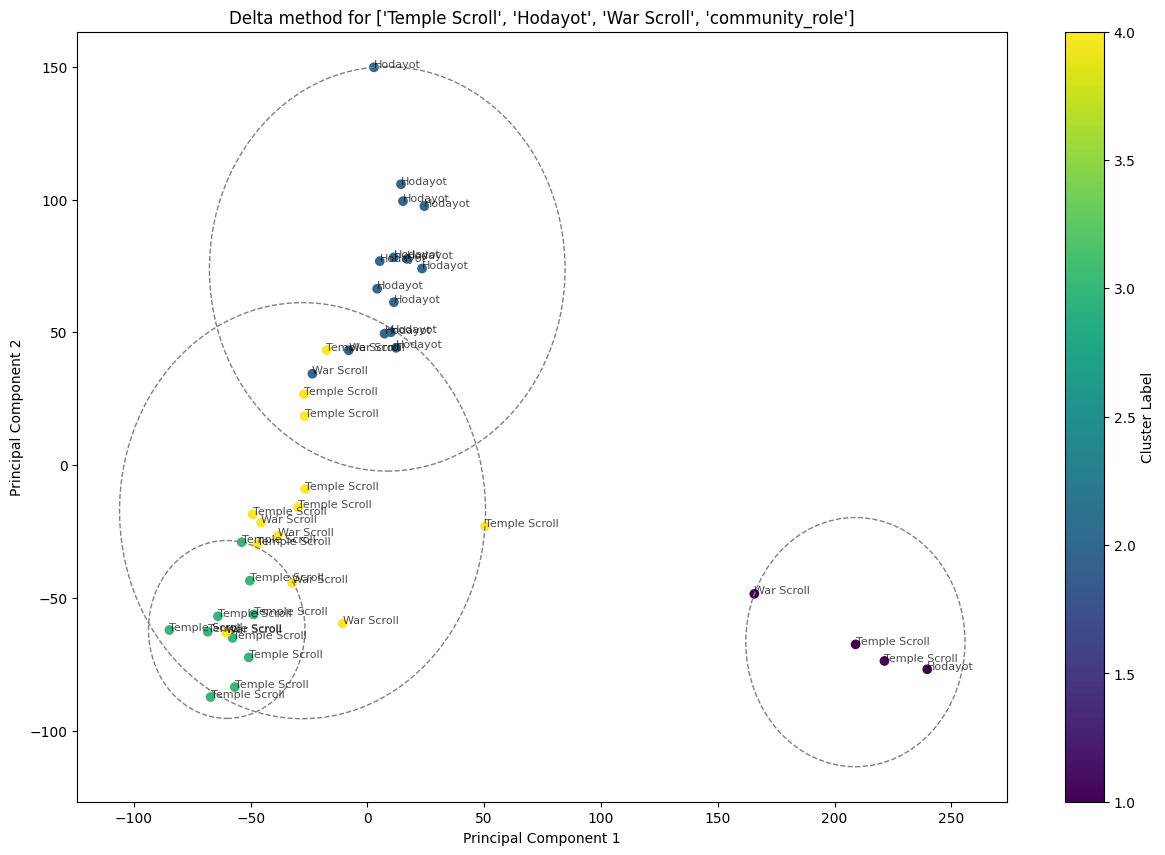

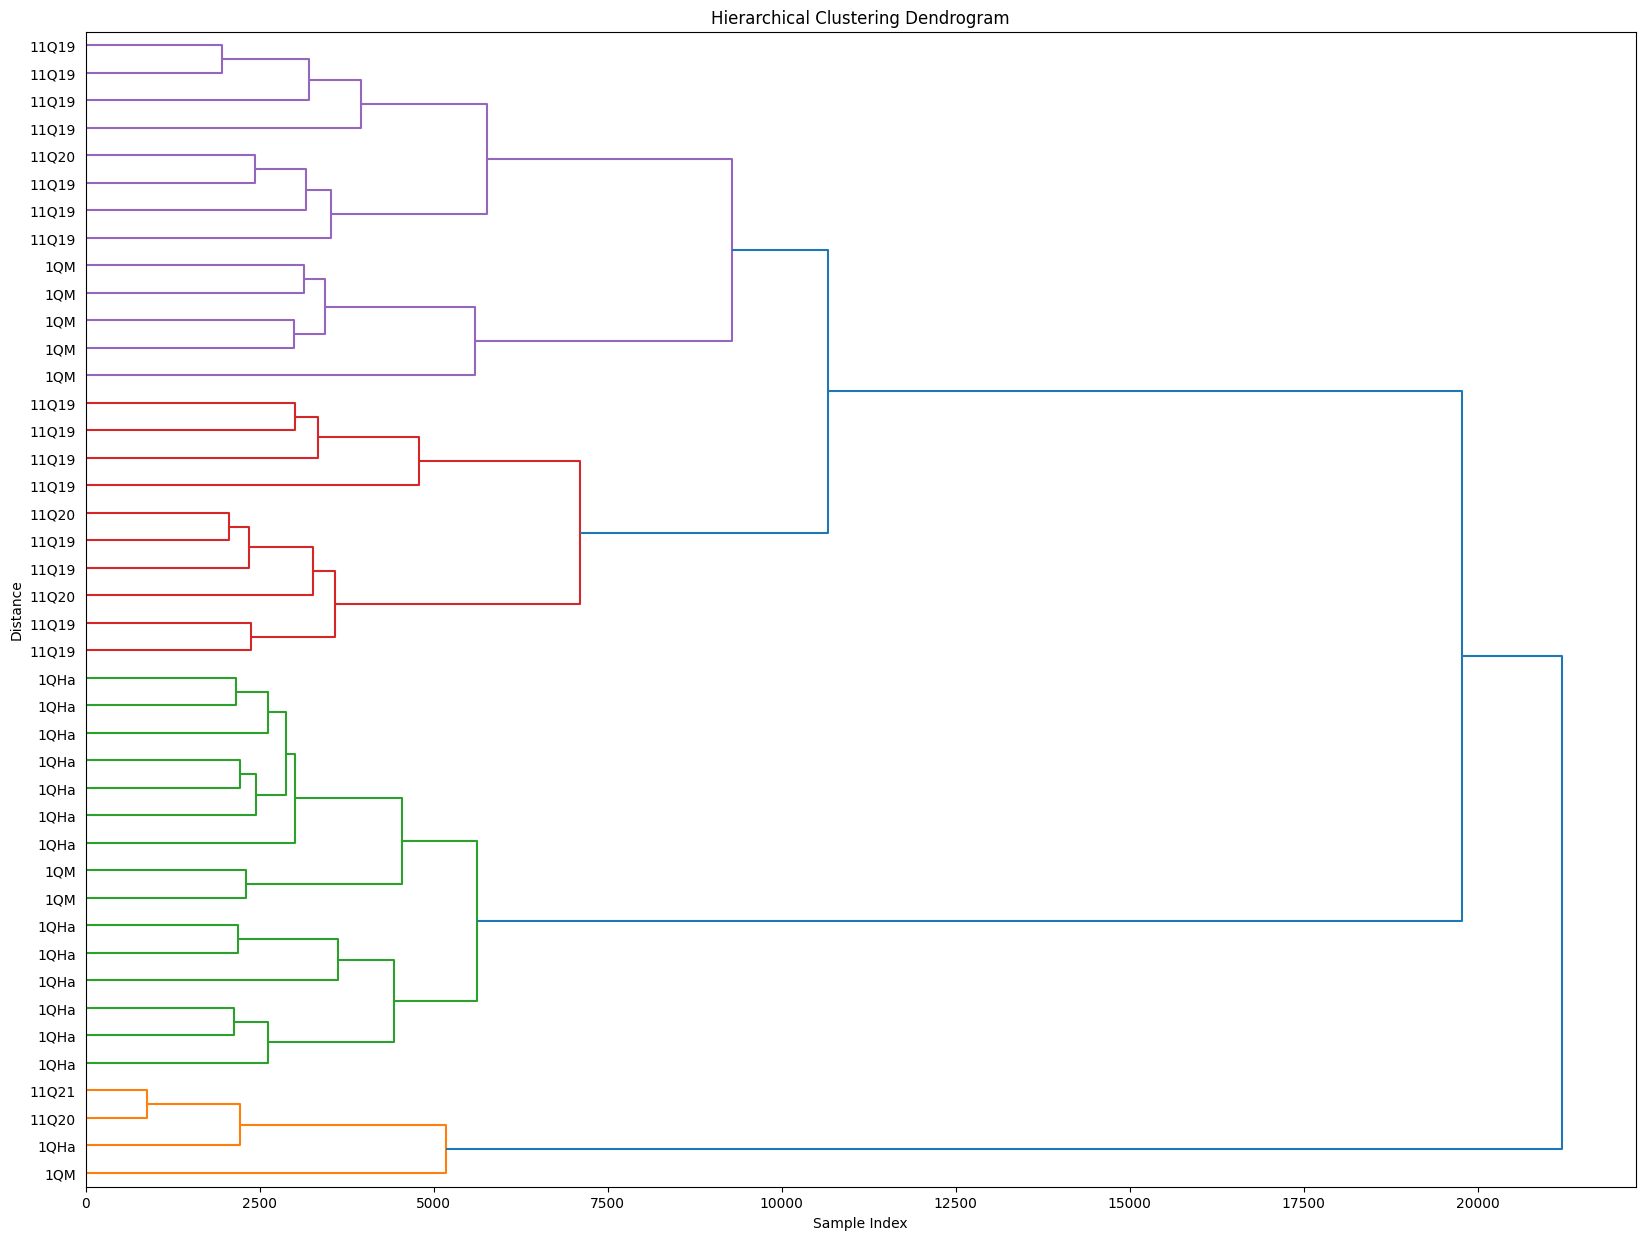

In [149]:
composition_to_check = ['Temple Scroll', 'Hodayot', 'War Scroll', 'community_role']
hierarchical_clustering_analysis(df_by_sentence, composition_to_check)

/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_48881/465291489.py:25: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


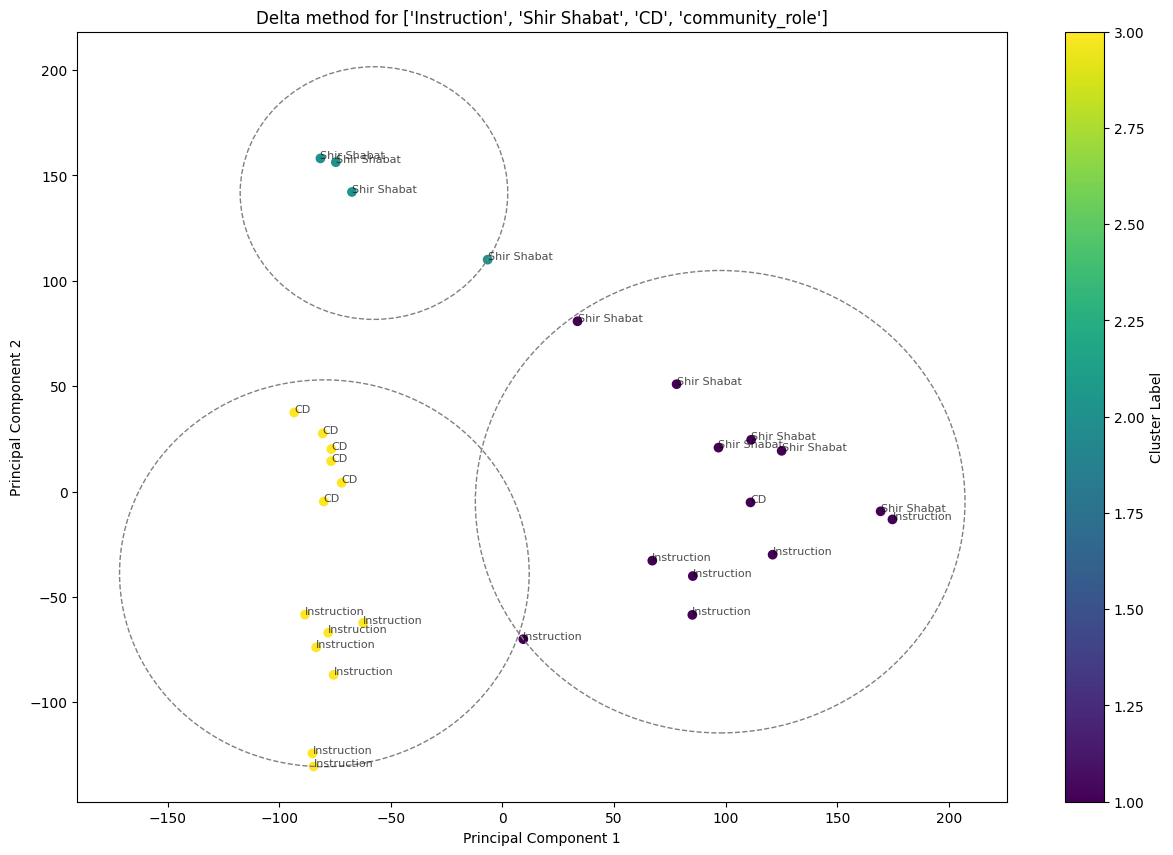

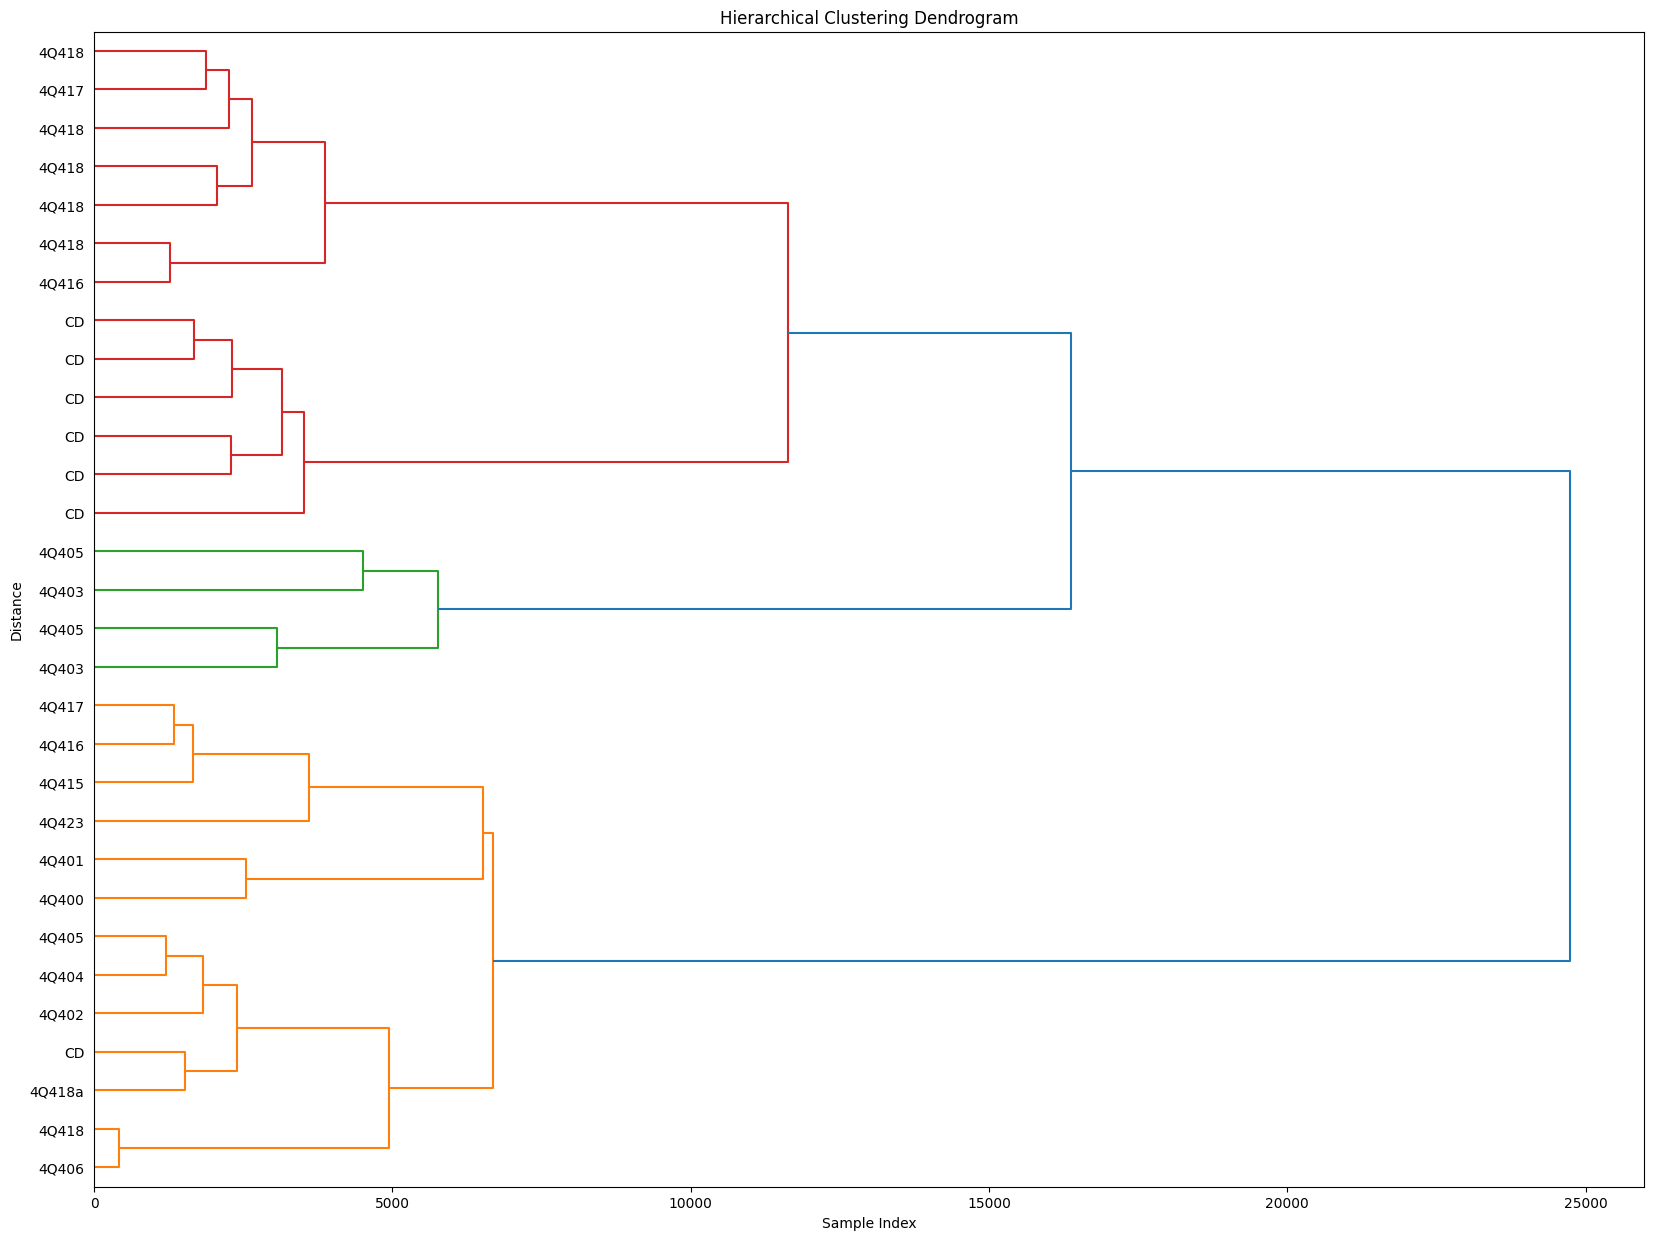

In [150]:
composition_to_check = ['Instruction', 'Shir Shabat', 'CD', 'community_role']
hierarchical_clustering_analysis(df_by_sentence, composition_to_check)

## Baselines

### Unsupervised clustering

In [ ]:


# Function to select and apply vectorizer
def vectorize_text(corpus, method='tfidf'):
    if method == 'tfidf':
        vectorizer = TfidfVectorizer(ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1)
    elif method == 'count':
        vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1)
    elif method == 'hashing':
        vectorizer = HashingVectorizer(ngram_range=(1, 1), analyzer='word', n_features=1000000)
    else:
        raise ValueError(f"Unknown vectorization method: {method}")
    X = vectorizer.fit_transform(corpus)
    return X


# Function for plotting
def plot_tsne(X, labels, clustering_label, sections, title):
    tsne = TSNE(n_components=2, random_state=0, perplexity=25)
    components = tsne.fit_transform(X.toarray())

    plt.figure(figsize=(20, 15))
    scatter = sns.scatterplot(x=components[:, 0], y=components[:, 1],
                              hue=labels, palette='pastel',
                              style=sections, s=100)

    for i, text in enumerate(clustering_label):
        plt.text(components[i, 0], components[i, 1], text,
                 fontdict=dict(color='black', size=10), ha='right')

    plt.title(title)
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


In [152]:
df_by_book["len_words"] = df_by_book["processed_text"].str.split(" ").str.len()
df_by_book[df_by_book["len_words"] >= 300]
df_by_book_non_nulls = df_by_book[~(df_by_book[clustering_label].isna())]
df_by_sentence = convert_df_by_book_to_df_by_sentence(df_by_book_non_nulls, "processed_text", 500)

In [296]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from transformers import BertModel, BertTokenizer
import torch
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('onlplab/alephbert-base')
# Load pre-trained model
BERT_MODEL = BertModel.from_pretrained('onlplab/alephbert-base')


def vectorize_text(corpus, method='tfidf'):
    if method == 'tfidf':
        vectorizer = TfidfVectorizer(max_df=1.0, min_df=1)
    elif method == 'trigram':
        vectorizer = CountVectorizer(ngram_range=(3, 3), analyzer='char', max_df=1.0, min_df=1)
    elif method == 'bert':
        # BERT embeddings
        BERT_MODEL.eval()
        with torch.no_grad():
            inputs = tokenizer(corpus.tolist(), padding=True, truncation=True, return_tensors="pt")
            outputs = BERT_MODEL(**inputs)
        return outputs.last_hidden_state.mean(dim=1).numpy()
    else:
        raise ValueError(f"Unknown vectorization method: {method}")
    X = vectorizer.fit_transform(corpus)
    return X


def apply_clustering(X, num_of_clusters, method='kmeans'):
    if type(X) != np.ndarray:
        X = X.toarray()
    if method == 'kmeans':
        clustering = KMeans(n_clusters=5).fit(X)
        labels_pred = clustering.labels_
    elif method == 'gmm':
        clustering = GaussianMixture(n_components=num_of_clusters).fit(X)
        labels_pred = clustering.predict(X)
    elif method == 'spectral_clustering':
        # affinity = pairwise_kernels(X, metric='nearest_neighbors',n_neighbors=10)
        # clustering = spectral_clustering(affinity=affinity, n_clusters=num_of_clusters, assign_labels="discretize", random_state=0)
        clustering = clustering = SpectralClustering(n_clusters=num_of_clusters, random_state=42,
                                                     affinity='nearest_neighbors', n_neighbors=10).fit(X)
        labels_pred = clustering.labels_
    else:
        raise ValueError(f"Unknown clustering method: {method}")
    return labels_pred


from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, mutual_info_score
from sklearn.metrics.cluster import contingency_matrix


def evaluate_clustering(X, labels_true, labels_pred):
    if type(X) != np.ndarray:
        X = X.toarray()

    silhouette = silhouette_score(X, labels_pred, metric='euclidean')
    davies_bouldin = davies_bouldin_score(X, labels_pred)
    adjusted_rand = adjusted_rand_score(labels_true, labels_pred)
    mutual_info = mutual_info_score(labels_true, labels_pred)
    contingency_mtx = contingency_matrix(labels_true, labels_pred)
    jaccard = np.sum(np.amax(contingency_mtx, axis=0)) / np.sum(contingency_mtx)

    # Calculate the Dunn index using an external library or a custom implementation

    return {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': davies_bouldin,
        'Adjusted Rand Index': adjusted_rand,
        'Mutual Information': mutual_info,
        'Jaccard Index': jaccard
    }



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [297]:
import pandas as pd
from datetime import datetime
from tqdm.notebook import tqdm

results = []
vectorizer_methods = [
    'tfidf',
    'trigram',
    'bert'
]
clustering_methods = [
    'kmeans',
    # 'gmm', 
    'spectral_clustering'
]
clustering_label = "composition"
windows = [50, 150, 500]

TOTAL_FRAC_FROM_DATA = 1
NUMBER_CVS = 5

for window_size in tqdm(windows, desc="Window"):
    df_by_sentence = convert_df_by_book_to_df_by_sentence(df_by_book_non_nulls, "processed_text", window_size)

    # Shuffle and split the data for cross-validation
    total_samples = int(len(df_by_sentence) * TOTAL_FRAC_FROM_DATA)
    cv_sample_size = total_samples // NUMBER_CVS

    shuffled_df = df_by_sentence.sample(frac=TOTAL_FRAC_FROM_DATA, random_state=42).reset_index(drop=True)

    for cv in tqdm(range(NUMBER_CVS), desc="Cross-validating"):
        start_index = cv * cv_sample_size
        end_index = start_index + cv_sample_size
        df_sampled = shuffled_df.iloc[start_index:end_index]

        print(f"{datetime.now()} - {window_size=}, CV={cv}, df size:{df_sampled.shape[0]}")

        for vectorizer_method in vectorizer_methods:
            print(f"vectorizer: {vectorizer_method}")
            X = vectorize_text(df_sampled['processed_text'], method=vectorizer_method)

            for clustering_method in clustering_methods:
                print(f"\t {datetime.now()} evaluating with {clustering_method}")
                labels_pred = apply_clustering(X, df_sampled[clustering_label].nunique(), method=clustering_method)
                evaluation_results = evaluate_clustering(X, df_sampled[clustering_label], labels_pred)

                # Store results in the dataframe
                results.append({
                    'Vectorizer': vectorizer_method,
                    'Clustering': clustering_method,
                    'Silhouette': evaluation_results['Silhouette Score'],
                    'Davies_Bouldin': evaluation_results['Davies-Bouldin Index'],
                    'Adjusted_Rand': evaluation_results['Adjusted Rand Index'],
                    'Mutual_Information': evaluation_results['Mutual Information'],
                    'Jaccard': evaluation_results['Jaccard Index'],
                    "window": window_size,
                    "CV": cv
                })
            print()

results_df = pd.DataFrame(results)
results_df.to_csv("data/clustering_results_cv.csv", index=False)


Window:   0%|          | 0/3 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/5 [00:00<?, ?it/s]

2024-05-15 17:08:30.910492 - window_size=50, CV=0, df size:253
vectorizer: tfidf
	 2024-05-15 17:08:30.939518 evaluating with kmeans
	 2024-05-15 17:08:31.175073 evaluating with spectral_clustering

vectorizer: trigram
	 2024-05-15 17:08:31.385862 evaluating with kmeans
	 2024-05-15 17:08:31.698243 evaluating with spectral_clustering

vectorizer: bert
	 2024-05-15 17:08:44.815064 evaluating with kmeans
	 2024-05-15 17:08:44.905669 evaluating with spectral_clustering

2024-05-15 17:08:45.049219 - window_size=50, CV=1, df size:253
vectorizer: tfidf
	 2024-05-15 17:08:45.082796 evaluating with kmeans
	 2024-05-15 17:08:45.305588 evaluating with spectral_clustering

vectorizer: trigram
	 2024-05-15 17:08:45.597319 evaluating with kmeans
	 2024-05-15 17:08:46.045729 evaluating with spectral_clustering

vectorizer: bert
	 2024-05-15 17:09:01.834931 evaluating with kmeans
	 2024-05-15 17:09:01.944547 evaluating with spectral_clustering

2024-05-15 17:09:02.097415 - window_size=50, CV=2, df si

Cross-validating:   0%|          | 0/5 [00:00<?, ?it/s]

2024-05-15 17:10:05.879501 - window_size=150, CV=0, df size:90
vectorizer: tfidf
	 2024-05-15 17:10:05.956352 evaluating with kmeans
	 2024-05-15 17:10:06.272581 evaluating with spectral_clustering

vectorizer: trigram
	 2024-05-15 17:10:06.804671 evaluating with kmeans
	 2024-05-15 17:10:07.177036 evaluating with spectral_clustering

vectorizer: bert
	 2024-05-15 17:10:36.042369 evaluating with kmeans
	 2024-05-15 17:10:36.121302 evaluating with spectral_clustering

2024-05-15 17:10:36.275330 - window_size=150, CV=1, df size:90
vectorizer: tfidf
	 2024-05-15 17:10:36.322731 evaluating with kmeans
	 2024-05-15 17:10:36.480792 evaluating with spectral_clustering

vectorizer: trigram
	 2024-05-15 17:10:36.750105 evaluating with kmeans
	 2024-05-15 17:10:36.948327 evaluating with spectral_clustering

vectorizer: bert
	 2024-05-15 17:10:54.806746 evaluating with kmeans
	 2024-05-15 17:10:54.868612 evaluating with spectral_clustering

2024-05-15 17:10:54.988371 - window_size=150, CV=2, df s

Cross-validating:   0%|          | 0/5 [00:00<?, ?it/s]

2024-05-15 17:11:49.950077 - window_size=500, CV=0, df size:36
vectorizer: tfidf
	 2024-05-15 17:11:49.985777 evaluating with kmeans
	 2024-05-15 17:11:50.085822 evaluating with spectral_clustering

vectorizer: trigram
	 2024-05-15 17:11:50.267604 evaluating with kmeans
	 2024-05-15 17:11:50.373435 evaluating with spectral_clustering

vectorizer: bert
	 2024-05-15 17:12:08.462850 evaluating with kmeans
	 2024-05-15 17:12:08.513363 evaluating with spectral_clustering

2024-05-15 17:12:08.598141 - window_size=500, CV=1, df size:36
vectorizer: tfidf
	 2024-05-15 17:12:08.638522 evaluating with kmeans
	 2024-05-15 17:12:08.753534 evaluating with spectral_clustering

vectorizer: trigram
	 2024-05-15 17:12:08.939623 evaluating with kmeans
	 2024-05-15 17:12:09.041622 evaluating with spectral_clustering

vectorizer: bert
	 2024-05-15 17:12:27.035834 evaluating with kmeans
	 2024-05-15 17:12:27.087509 evaluating with spectral_clustering

2024-05-15 17:12:27.184291 - window_size=500, CV=2, df s

In [298]:
results_df

,Vectorizer,Clustering,Silhouette,Davies_Bouldin,Adjusted_Rand,Mutual_Information,Jaccard,window,CV
0,tfidf,kmeans,0.004860,8.246549,0.059379,0.527278,0.249012,50,0
1,tfidf,spectral_clustering,0.022116,4.044990,0.305117,1.821566,0.600791,50,0
2,trigram,kmeans,0.019748,4.587048,0.055015,0.572104,0.245059,50,0
3,trigram,spectral_clustering,-0.002471,2.488518,0.009715,0.918212,0.387352,50,0
4,bert,kmeans,0.048366,2.857221,0.067451,0.560967,0.245059,50,0
...,...,...,...,...,...,...,...,...,...
85,tfidf,spectral_clustering,0.035482,1.428976,0.182392,2.293119,0.666667,500,4
86,trigram,kmeans,0.206363,1.539114,-0.002701,0.748137,0.277778,500,4
87,trigram,spectral_clustering,-0.060444,1.010292,0.053147,1.996912,0.583333,500,4
88,bert,kmeans,0.278094,1.135200,-0.002981,0.669054,0.222222,500,4


/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_48881/265350780.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values[metric] = anova_table["PR(>F)"][0]
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_48881/265350780.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values[metric] = anova_table["PR(>F)"][0]
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_48881/265350780.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value

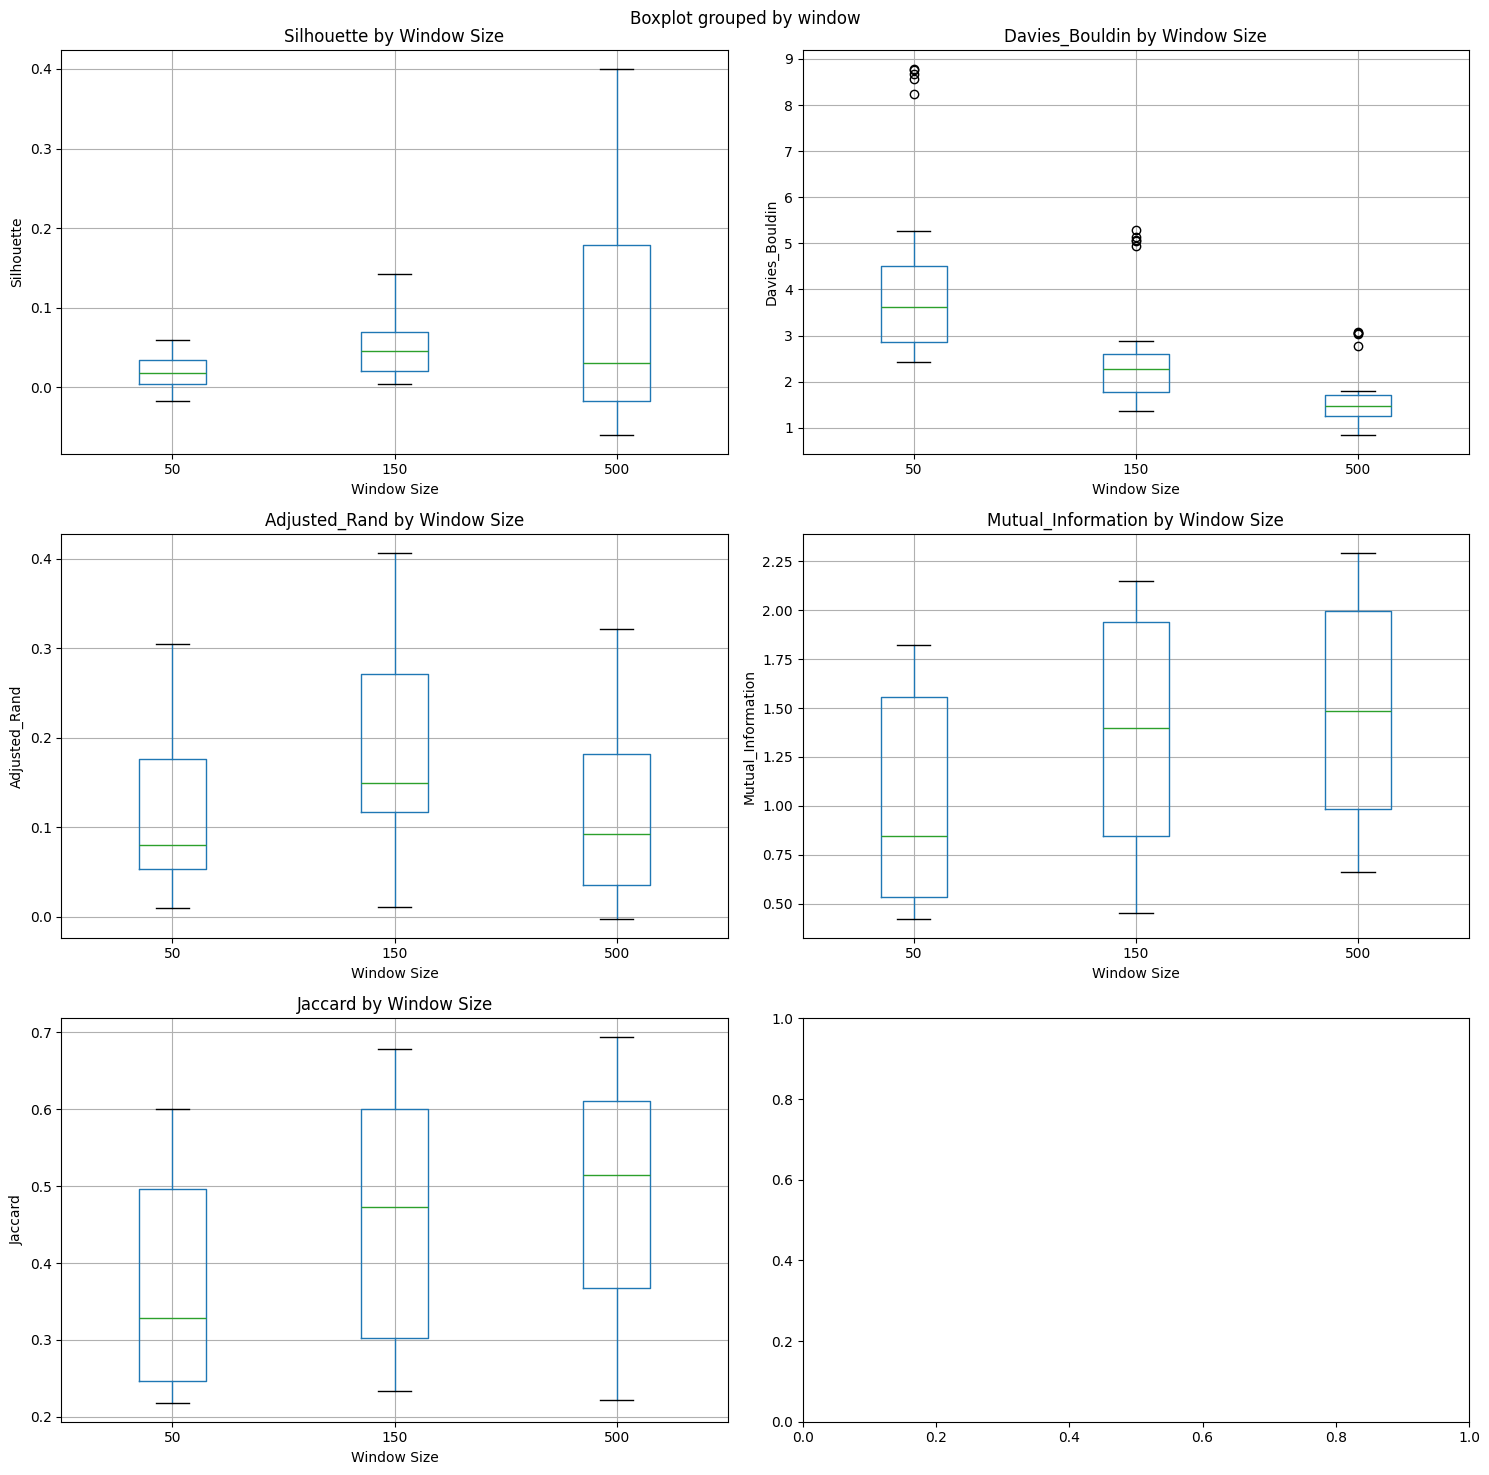

P-values for each metric across window sizes:
{'Silhouette': 0.01659417343025145, 'Davies_Bouldin': 3.1366589170197104e-09, 'Adjusted_Rand': 0.004713791761959595, 'Mutual_Information': 0.002829917730246165, 'Jaccard': 0.00511958958333191}


In [299]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your results into a DataFrame
# results_df = pd.DataFrame(results) # Assuming results_df is already loaded

# Perform ANOVA for each metric and plot results
metrics = ['Silhouette', 'Davies_Bouldin',
           'Adjusted_Rand', 'Mutual_Information', 'Jaccard']
p_values = {}
# Setup plot layout
n_metrics = len(metrics)
fig, axs = plt.subplots((n_metrics + 1) // 2, 2, figsize=(15, 15))  # Adjust figure size as needed
axs = axs.flatten()  # Flatten the axis array

for i, metric in enumerate(metrics):
    # Prepare model for ANOVA
    model = ols(f'{metric} ~ C(window)', data=results_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Store p-value
    p_values[metric] = anova_table["PR(>F)"][0]

    # Plotting
    results_df.boxplot(metric, by='window', ax=axs[i])
    axs[i].set_title(f'{metric} by Window Size')
    axs[i].set_xlabel('Window Size')
    axs[i].set_ylabel(metric)
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print the ANOVA p-values
print("P-values for each metric across window sizes:")
print(p_values)

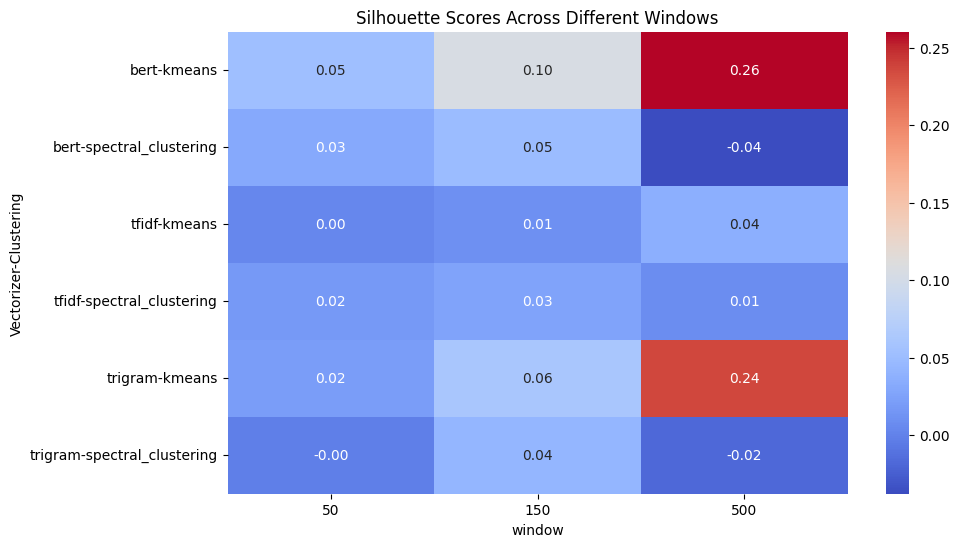

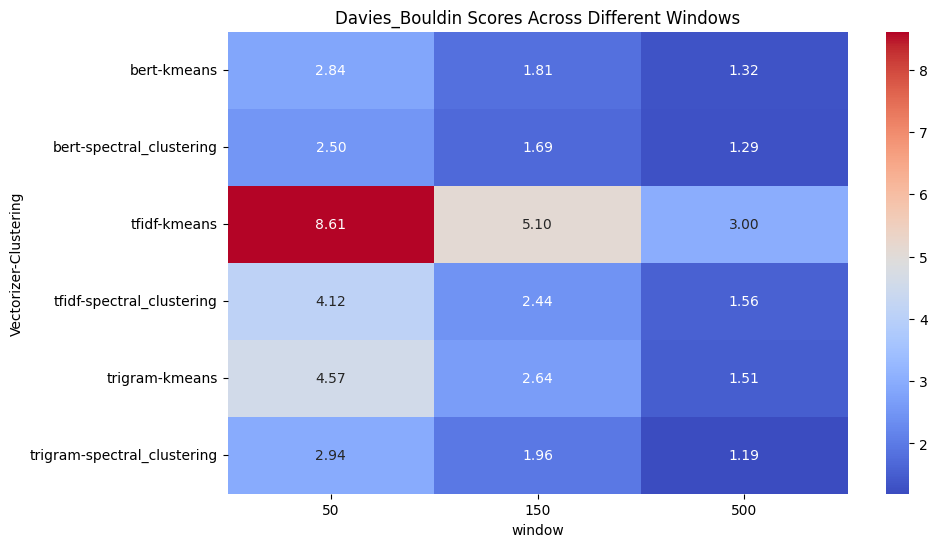

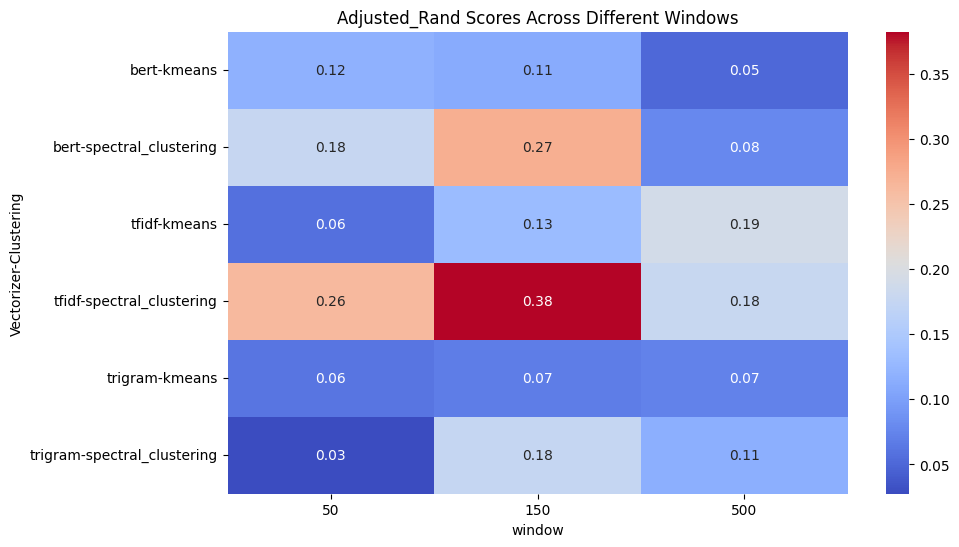

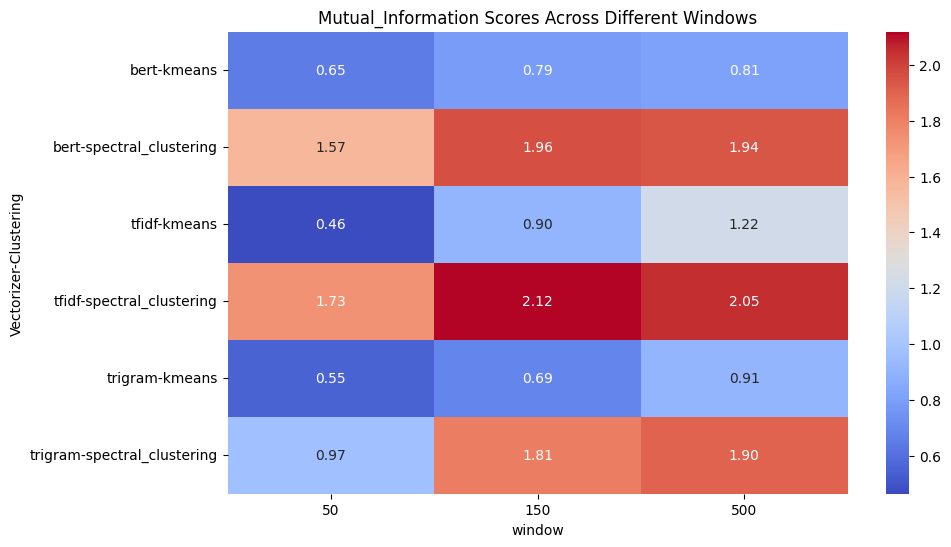

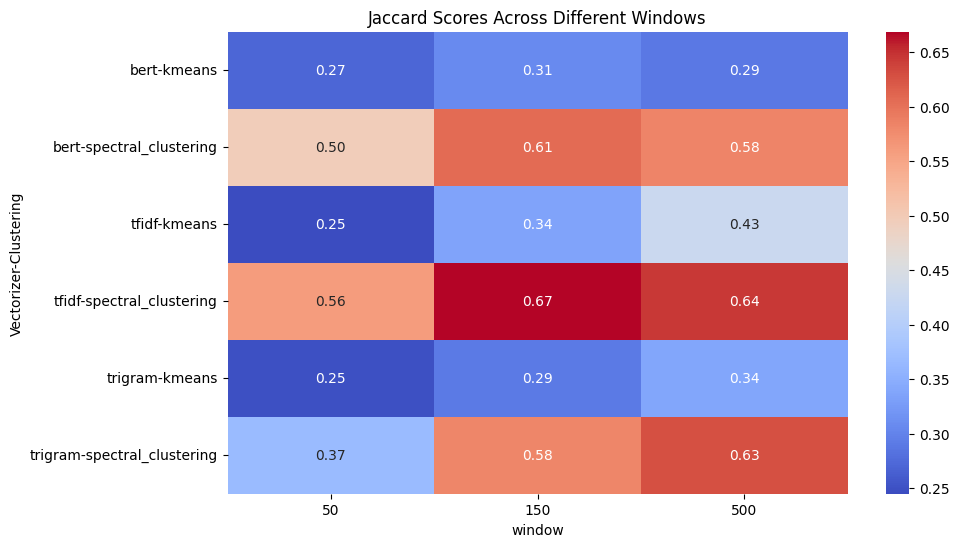

In [301]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming results_df is your DataFrame containing the results

# Step 1: Aggregate results
mean_scores = results_df.groupby(['window', 'Vectorizer', 'Clustering']).mean().reset_index()

# Step 2: Rank combinations for each metric and compute average rank
for metric in metrics:
    mean_scores[f'{metric}_rank'] = mean_scores.groupby('window')[metric].rank(
        ascending=False if metric != 'Davies_Bouldin' else True)

mean_scores['Average Rank'] = mean_scores[[f'{metric}_rank' for metric in metrics]].mean(axis=1)

# Step 3: Plot results
# Heatmap for average ranks
pivot_table = mean_scores.pivot_table(index=['Vectorizer', 'Clustering'], columns='window', values='Average Rank',
                                      aggfunc='mean')
# plt.figure(figsize=(10, 6))
# sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Average Rank of Clustering Combinations Across Windows')
# plt.show()

# You can also plot individual metrics if needed
for metric in metrics:
    pivot_table = mean_scores.pivot_table(index=['Vectorizer', 'Clustering'], columns='window', values=metric,
                                          aggfunc='mean')
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm' if metric != 'Davies-Bouldin' else 'coolwarm_r', fmt=".2f")
    plt.title(f'{metric} Scores Across Different Windows')
    plt.show()


In [302]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming results_df is your DataFrame containing the results

# Step 1: Calculate mean and std for each combination
agg_results = results_df.groupby(['window', 'Vectorizer', 'Clustering']).agg(
    {metric: ['mean', 'std'] for metric in metrics}
).reset_index()
agg_results


window Vectorizer           Clustering Silhouette           Davies_Bouldin  \
                                                mean       std           mean   
0      50       bert               kmeans   0.052398  0.004608       2.841120   
1      50       bert  spectral_clustering   0.031717  0.009429       2.503861   
2      50      tfidf               kmeans   0.003107  0.001016       8.607829   
3      50      tfidf  spectral_clustering   0.017251  0.003537       4.115309   
4      50    trigram               kmeans   0.020842  0.006090       4.568198   
5      50    trigram  spectral_clustering  -0.001838  0.009205       2.944679   
6     150       bert               kmeans   0.104996  0.031176       1.808247   
7     150       bert  spectral_clustering   0.049563  0.013619       1.687187   
8     150      tfidf               kmeans   0.011130  0.001475       5.096022   
9     150      tfidf  spectral_clustering   0.026033  0.004732       2.443303   
10    150    trigram               kmeans   0.061192  0.013933       2.644878   
11    150    trigram  spectral_clustering   0.043748  0.035215       1.956746   
12    500       bert               kmeans   0.260334  0.108528       1.317190   
13    500       bert  spectral_clustering  -0.037663  0.020161       1.286664   
14    500      tfidf               kmeans   0.036585  0.010684       3.003456   
15    500      tfidf  spectral_clustering   0.008722  0.022392       1.564275   
16    500    trigram               kmeans   0.235905  0.047950       1.506872   
17    500    trigram  spectral_clustering  -0.018601  0.043625       1.193535   

             Adjusted_Rand           Mutual_Information             Jaccard  \
         std          mean       std               mean       std      mean   
0   0.195494      0.118350  0.045100           0.648141  0.120608  0.270356   
1   0.067643      0.176819  0.016348           1.572996  0.047213  0.495652   
2   0.218188      0.057175  0.002985           0.464006  0.039514  0.245059   
3   0.074113      0.262784  0.037791           1.734275  0.090585  0.561265   
4   0.470264      0.061138  0.018561           0.550111  0.067847  0.249802   
5   0.294250      0.027536  0.014216           0.974350  0.055586  0.366798   
6   0.344179      0.111472  0.025308           0.785752  0.101259  0.306667   
7   0.047261      0.273523  0.035378           1.959227  0.101251  0.606667   
8   0.127079      0.130520  0.056511           0.903530  0.098722  0.335556   
9   0.094120      0.382326  0.024395           2.118544  0.024170  0.668889   
10  0.240626      0.067747  0.046261           0.685631  0.172789  0.291111   
11  0.158674      0.175218  0.028689           1.808626  0.075201  0.582222   
12  0.350467      0.049808  0.061720           0.809705  0.175413  0.288889   
13  0.210801      0.077757  0.079274           1.940110  0.168785  0.583333   
14  0.126558      0.191038  0.086092           1.219087  0.112152  0.427778   
15  0.124103      0.177945  0.107886           2.049399  0.157058  0.644444   
16  0.251458      0.073185  0.089941           0.906594  0.211175  0.338889   
17  0.172757      0.114900  0.067942           1.903552  0.189128  0.627778   

              
         std  
0   0.032785  
1   0.022113  
2   0.012499  
3   0.042109  
4   0.027298  
5   0.022945  
6   0.016851  
7   0.032961  
8   0.046081  
9   0.009296  
10  0.055221  
11  0.018592  
12  0.080027  
13  0.051967  
14  0.066898  
15  0.045644  
16  0.084254  
17  0.042127

In [303]:
import pandas as pd

metrics = ["Adjusted_Rand", "Jaccard"]

stats = results_df.groupby(['window', 'Vectorizer', 'Clustering']).agg(
    {metric: ['mean', 'std'] for metric in metrics}
).reset_index()

# Create a multi-index for clarity in the final table
stats.set_index(['Vectorizer', 'Clustering', 'window'], inplace=True)

# Format the mean and std into a single string for each metric, and store sortable values for Adjusted Rand
for metric in metrics:
    stats[(metric, 'formatted')] = stats[(metric, 'mean')].round(2).astype(str) + " (" + stats[(metric, 'std')].round(
        2).astype(str) + ")"
    stats[(metric, 'sortable')] = stats[(metric, 'mean')]

# Sort by Adjusted Rand Index
stats.sort_values([('Adjusted_Rand', 'sortable'), ('Jaccard', 'sortable')], ascending=[False, False], inplace=True)

#  Drop the multi-level columns for mean, std, and sortable, only keep formatted
# for metric in ['Silhouette', 'Davies-Bouldin', 'Adjusted Rand', 'Mutual Information', 'Jaccard']:
#     stats.drop([(metric, 'mean'), (metric, 'std'), (metric, 'sortable')], axis=1, errors='ignore', inplace=True)

# # Flatten the columns for easier access in LaTeX
# stats.columns = stats.columns.droplevel(1)  # Drop the 'formatted' level

# # Convert to LaTeX
# latex_table = stats.unstack(level='window')  # Unstack the window size to columns
# latex_table = latex_table.reorder_levels([1, 0], axis=1)  # Reorder levels for better readability
# latex_table.columns = latex_table.columns.map(lambda x: f'{x[1]} ({x[0]})')  # Rename columns to include window size

# # Print LaTeX code
# print(latex_table.to_latex(escape=False))
stats

Adjusted_Rand             Jaccard  \
                                               mean       std      mean   
Vectorizer Clustering          window                                     
tfidf      spectral_clustering 150         0.382326  0.024395  0.668889   
bert       spectral_clustering 150         0.273523  0.035378  0.606667   
tfidf      spectral_clustering 50          0.262784  0.037791  0.561265   
           kmeans              500         0.191038  0.086092  0.427778   
           spectral_clustering 500         0.177945  0.107886  0.644444   
bert       spectral_clustering 50          0.176819  0.016348  0.495652   
trigram    spectral_clustering 150         0.175218  0.028689  0.582222   
tfidf      kmeans              150         0.130520  0.056511  0.335556   
bert       kmeans              50          0.118350  0.045100  0.270356   
trigram    spectral_clustering 500         0.114900  0.067942  0.627778   
bert       kmeans              150         0.111472  0.025308  0.306667   
           spectral_clustering 500         0.077757  0.079274  0.583333   
trigram    kmeans              500         0.073185  0.089941  0.338889   
                               150         0.067747  0.046261  0.291111   
                               50          0.061138  0.018561  0.249802   
tfidf      kmeans              50          0.057175  0.002985  0.245059   
bert       kmeans              500         0.049808  0.061720  0.288889   
trigram    spectral_clustering 50          0.027536  0.014216  0.366798   

                                                Adjusted_Rand            \
                                            std     formatted  sortable   
Vectorizer Clustering          window                                     
tfidf      spectral_clustering 150     0.009296   0.38 (0.02)  0.382326   
bert       spectral_clustering 150     0.032961   0.27 (0.04)  0.273523   
tfidf      spectral_clustering 50      0.042109   0.26 (0.04)  0.262784   
           kmeans              500     0.066898   0.19 (0.09)  0.191038   
           spectral_clustering 500     0.045644   0.18 (0.11)  0.177945   
bert       spectral_clustering 50      0.022113   0.18 (0.02)  0.176819   
trigram    spectral_clustering 150     0.018592   0.18 (0.03)  0.175218   
tfidf      kmeans              150     0.046081   0.13 (0.06)  0.130520   
bert       kmeans              50      0.032785   0.12 (0.05)  0.118350   
trigram    spectral_clustering 500     0.042127   0.11 (0.07)  0.114900   
bert       kmeans              150     0.016851   0.11 (0.03)  0.111472   
           spectral_clustering 500     0.051967   0.08 (0.08)  0.077757   
trigram    kmeans              500     0.084254   0.07 (0.09)  0.073185   
                               150     0.055221   0.07 (0.05)  0.067747   
                               50      0.027298   0.06 (0.02)  0.061138   
tfidf      kmeans              50      0.012499    0.06 (0.0)  0.057175   
bert       kmeans              500     0.080027   0.05 (0.06)  0.049808   
trigram    spectral_clustering 50      0.022945   0.03 (0.01)  0.027536   

                                           Jaccard            
                                         formatted  sortable  
Vectorizer Clustering          window                         
tfidf      spectral_clustering 150     0.67 (0.01)  0.668889  
bert       spectral_clustering 150     0.61 (0.03)  0.606667  
tfidf      spectral_clustering 50      0.56 (0.04)  0.561265  
           kmeans              500     0.43 (0.07)  0.427778  
           spectral_clustering 500     0.64 (0.05)  0.644444  
bert       spectral_clustering 50       0.5 (0.02)  0.495652  
trigram    spectral_clustering 150     0.58 (0.02)  0.582222  
tfidf      kmeans              150     0.34 (0.05)  0.335556  
bert       kmeans              50      0.27 (0.03)  0.270356  
trigram    spectral_clustering 500     0.63 (0.04)  0.627778  
bert       kmeans              150     0.31 (0.02)  0.306667  
    

### Silhouette Score
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. The formula for the Silhouette Score for a single sample is:
$$ s = \frac{b - a}{\max(a, b)} $$
where $a$ is the mean distance to the other samples in the same cluster (cohesion), and $b$ is the mean distance to the samples in the nearest cluster (separation). A higher Silhouette Score is better, with a maximum of 1 indicating perfect clustering.

### Davies-Bouldin Index
The Davies-Bouldin Index evaluates the average similarity between each cluster and its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The formula is:
$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right) $$
where $\sigma$ is the average distance of all points in the cluster to the cluster centroid $c$, and $d(c_i, c_j)$ is the distance between centroids $c_i$ and $c_j$. A lower Davies-Bouldin Index indicates better clustering.

### Adjusted Rand Index
The Adjusted Rand Index is a measure of the similarity between two data clusterings, corrected for chance. It has a maximum of 1 and can be less than 0. The formula for the Adjusted Rand Index is:
$$ ARI = \frac{\sum_{ij} \binom{n_{ij}}{2} - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}{\frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}] - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}} $$
where $n_{ij}$ is the number of objects in both clusters $i$ and $j$, $a_i$ is the number of objects in cluster $i$, and $b_j$ is the number of objects in cluster $j$. Higher values are better.

### Mutual Information
Mutual Information measures the amount of information shared between two clusterings, reflecting how much knowing one of these clusterings reduces uncertainty about the other. The formula is:
$$ MI = \sum_{k,l} P(k,l) \log \frac{P(k,l)}{P(k)P(l)} $$
where $P(k,l)$ is the joint probability distribution function of clusterings $k$ and $l$, and $P(k)$ and $P(l)$ are the marginal probability distributions. Higher values indicate more shared information.

### Jaccard Index
The Jaccard Index, or Jaccard similarity coefficient, measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets:
$$ J(A,B) = \frac{|A \cap B|}{|A \cup B|} $$
where $A$ and $B$ are sets of labels. Higher values are better, indicating a greater overlap between the clusters compared to the total size.


### Supervised

In [147]:
df_sampled = df_by_sentence.sample(frac=1, random_state=42)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df_sampled[clustering_label])
vectorizer_method = 'tfidf'  # Change to 'count' or 'hashing' as needed
X = vectorize_text(df_sampled['processed_text'], method=vectorizer_method)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Compute Jaccard Index
jaccard_index = jaccard_score(y_test, y_pred, average='macro')
rand_index = adjusted_rand_score(y_test, y_pred)
print(f"Jaccard Index: {jaccard_index}")

unique_classes = sorted(set(y_test))
target_names = [label_encoder.inverse_transform([cls])[0] for cls in unique_classes]

# Print classification report
# print(classification_report(y_test, y_pred, labels=unique_classes, target_names=target_names))



Jaccard Index: 0.2526793764472453
                                    precision    recall  f1-score   support

                               4QH       0.20      0.06      0.09        49
                               4QM       0.18      0.10      0.12        31
                             4QMMT       0.96      0.82      0.89        33
                               4QS       0.38      0.21      0.27        67
                     Barkhi_Nafshi       1.00      0.13      0.24        15
                          Berakhot       0.67      0.43      0.52        14
                  Book_of_Jubilees       0.58      0.25      0.35        55
                                CD       0.46      0.69      0.55        45
                Catena_Florilegium       0.00      0.00      0.00        20
             Collections_of_psalms       0.67      0.21      0.32        19
                           Hodayot       0.49      0.71      0.58       143
                       Instruction       0.55      0.

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [ ]:
# Plotting
plot_title = f'Text Clustering by Book ({vectorizer_method.upper()})'
plot_tsne(X, df_sampled['cluster'], df_sampled[clustering_label], df_sampled['section'], plot_title)

In [58]:
jaccard_index = compute_jaccard_index(encoded_labels, clusters)
print(f"Jaccard Index: {jaccard_index}")


Jaccard Index: 0.018000000000000002


In [61]:
import random

random.shuffle(clusters)
jaccard_index = compute_jaccard_index(encoded_labels, clusters)
print(f"Jaccard Index: {jaccard_index}")


Jaccard Index: 0.012380952380952381


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


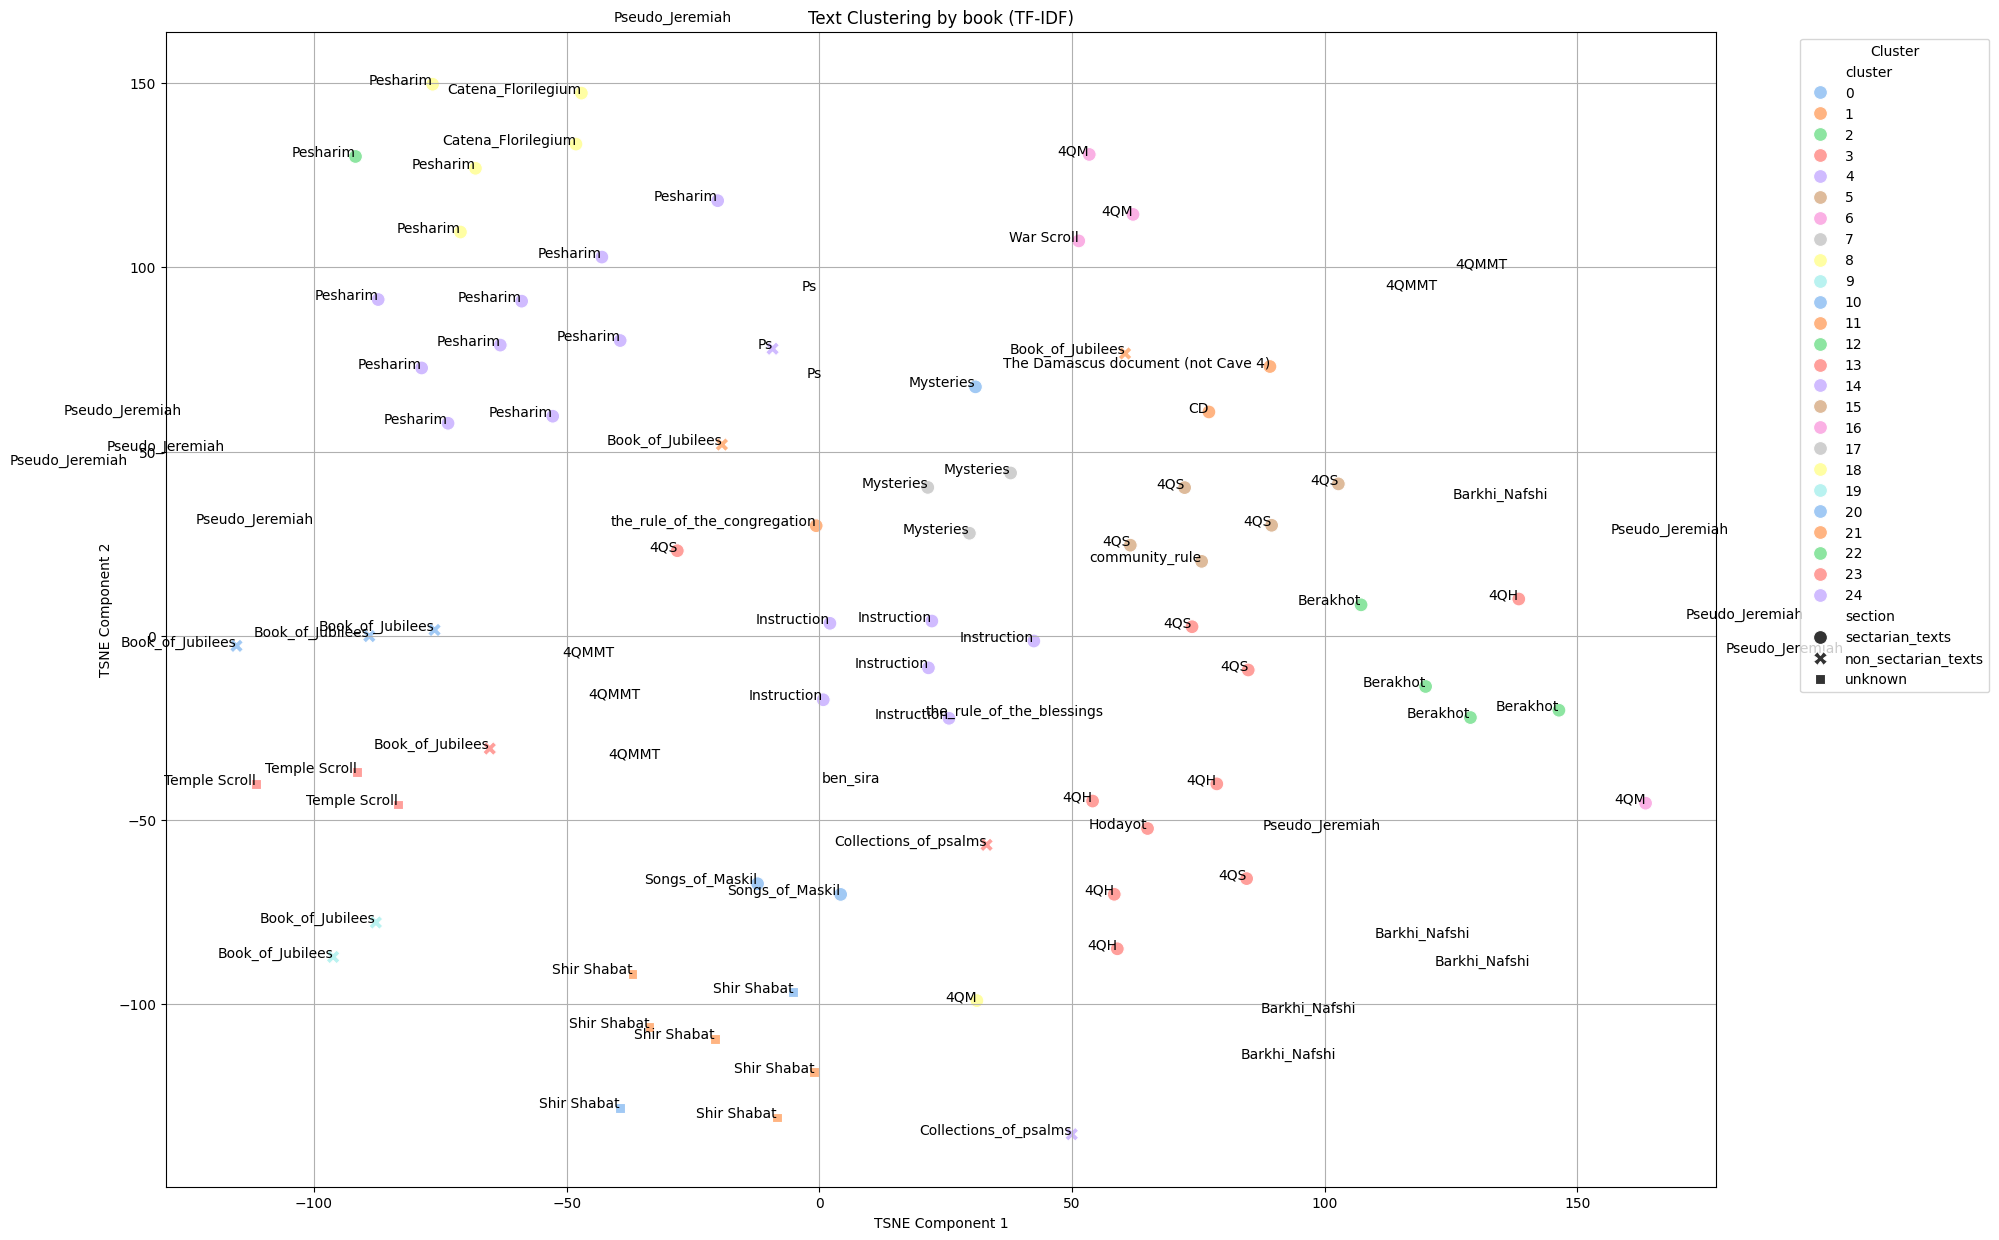

In [62]:

df_sampled = df_by_book_non_nulls.sample(frac=1, random_state=42)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_sampled['processed_text'])

# Step 2: Clustering
kmeans = KMeans(n_clusters=df_sampled[clustering_label].nunique(), random_state=0)
clusters = kmeans.fit_predict(X)
df_sampled['cluster'] = clusters

# Visualization
tsne = TSNE(n_components=2, random_state=0, perplexity=25)
components = tsne.fit_transform(X.toarray())

# Plot using seaborn for the scatter plot
plt.figure(figsize=(20, 15))
scatter = sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df_sampled['cluster'], palette='pastel',
                          style=df_sampled['section'], s=100)

# Adding text labels
for i, text in enumerate(df_sampled[clustering_label]):
    plt.text(components[i, 0], components[i, 1], text, fontdict=dict(color='black', size=10), ha='right')

plt.title('Text Clustering by book (TF-IDF)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# plt.savefig("tsne_by_book.png")
plt.show()

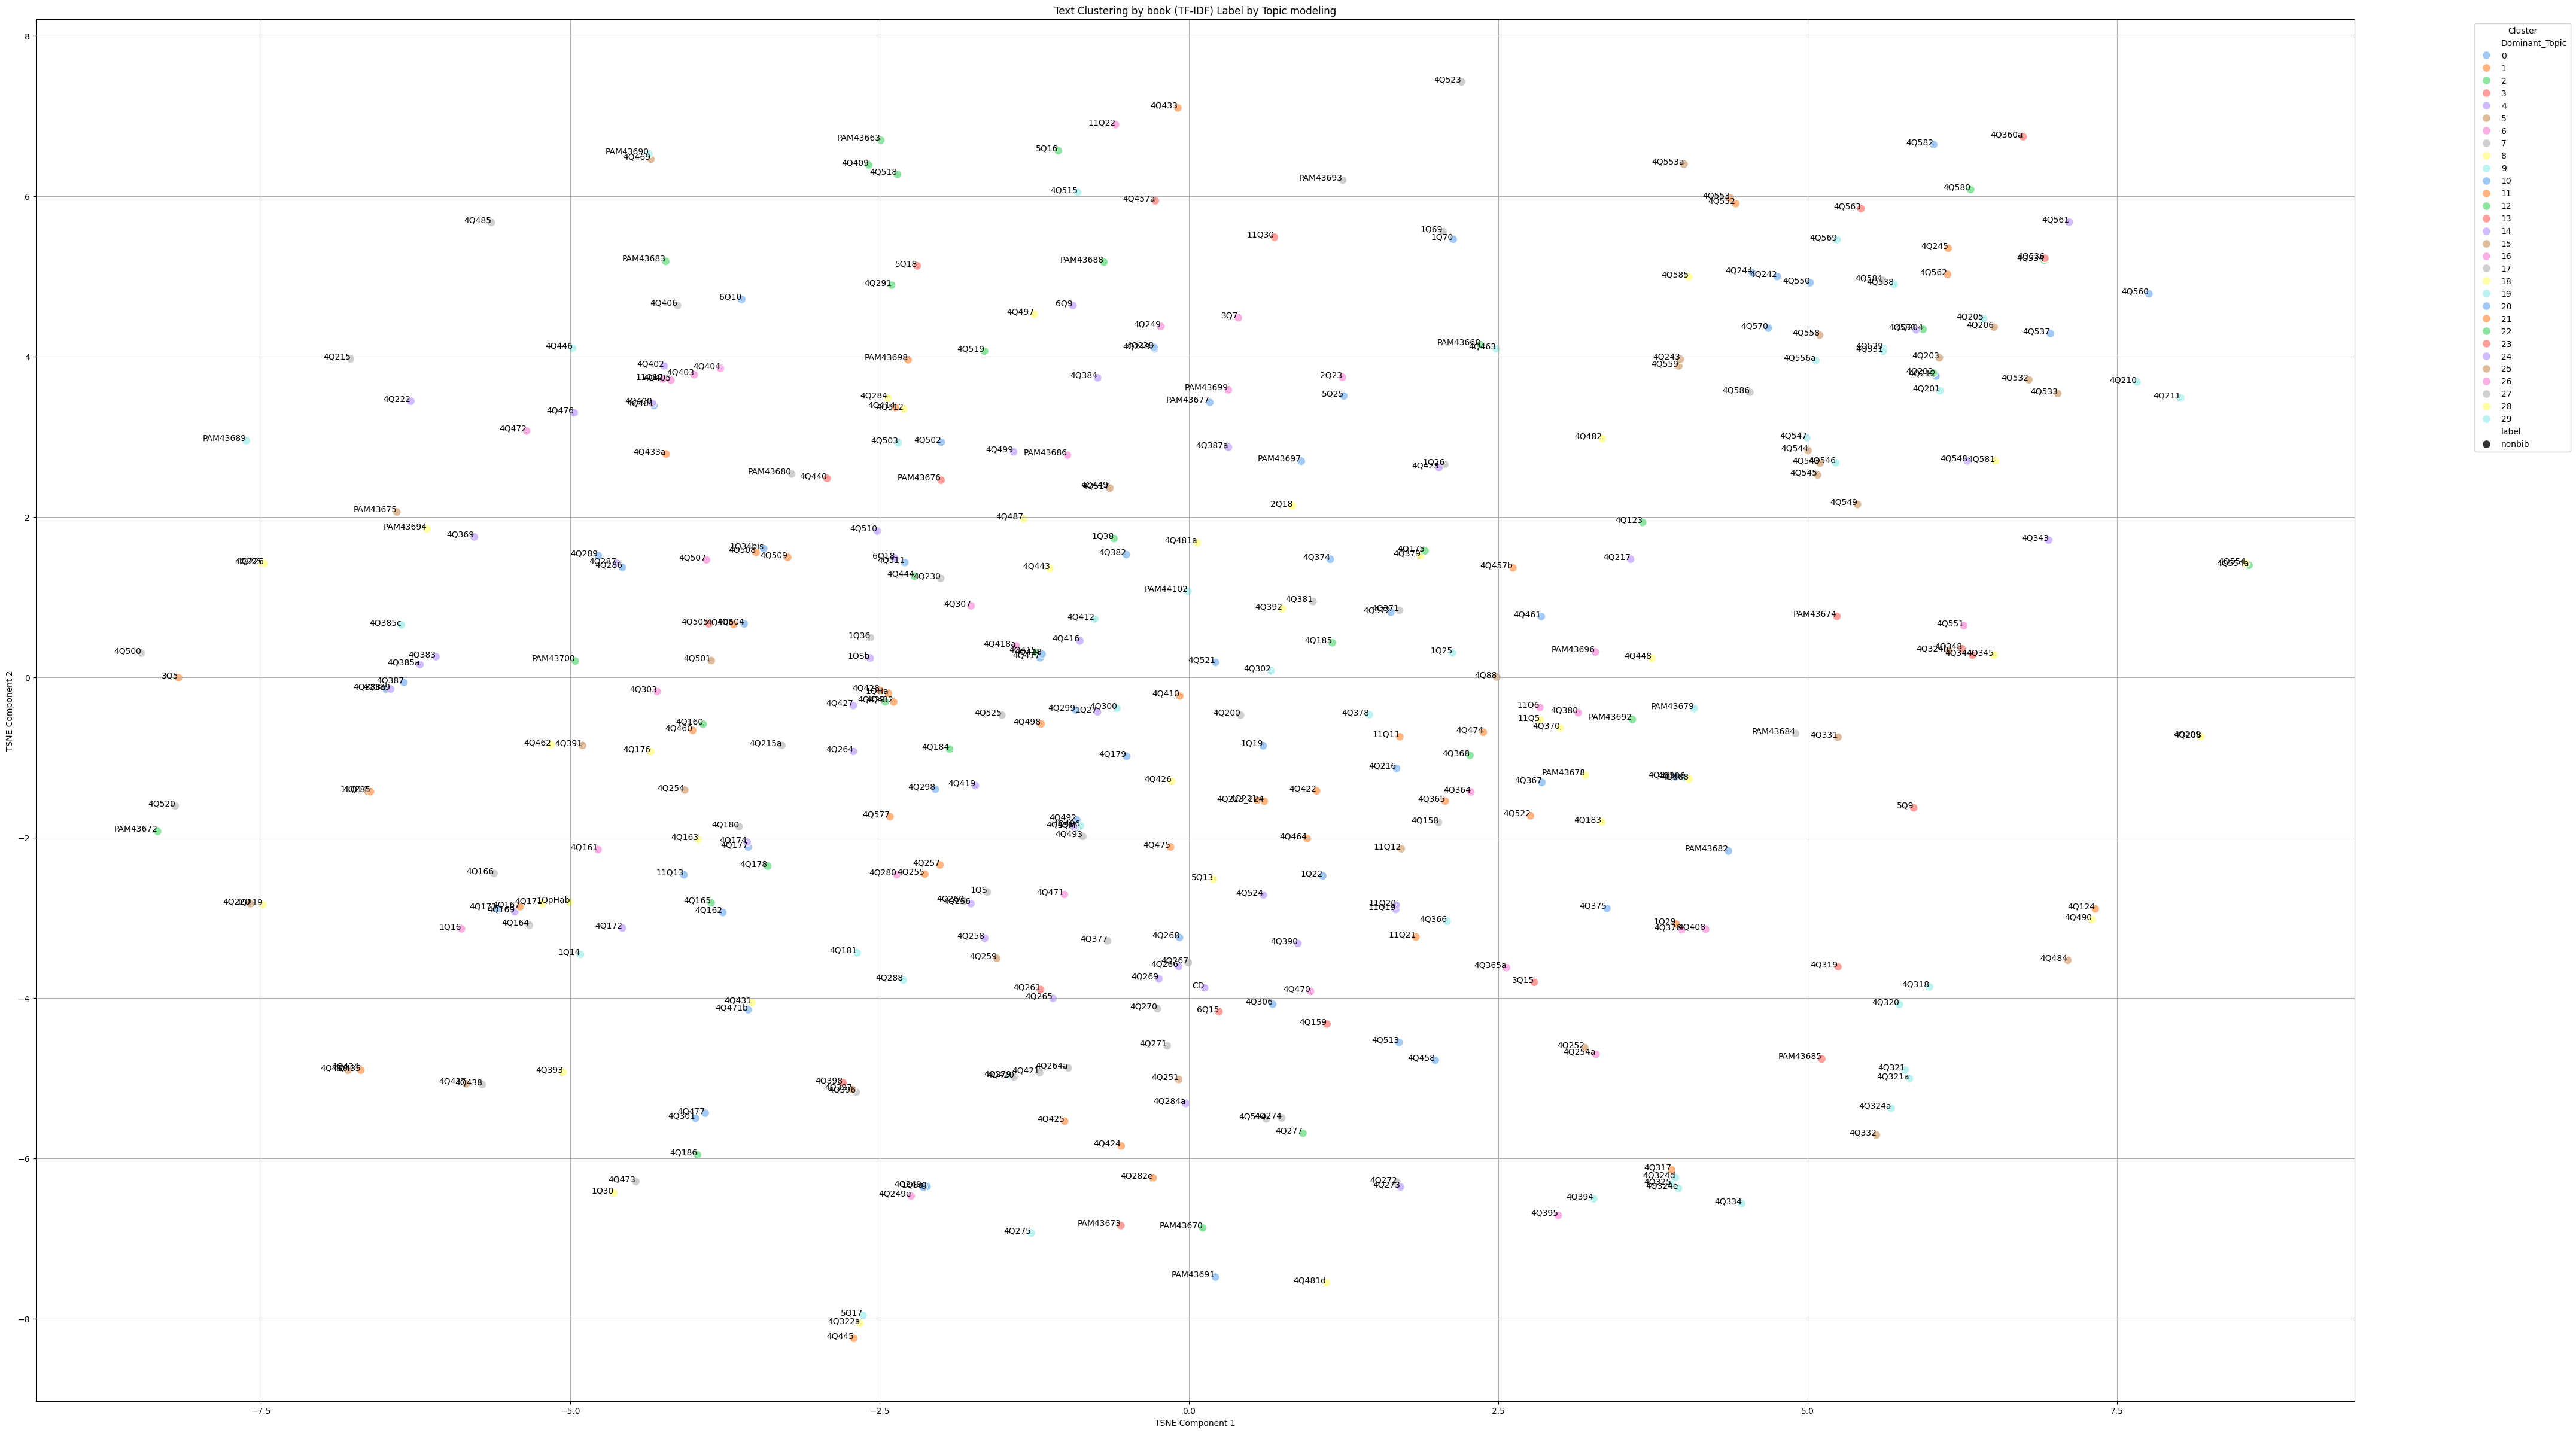

In [40]:

plt.figure(figsize=(50, 30))
scatter = sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df_sampled['Dominant_Topic'], palette='pastel',
                          style=df_sampled['label'], s=100)

# Adding text labels
for i, text in enumerate(df_sampled['book']):
    plt.text(components[i, 0], components[i, 1], text, fontdict=dict(color='black', size=10), ha='right')

plt.title('Text Clustering by book (TF-IDF) Label by Topic modeling')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()